In [3]:
from IPython.core.display import display, HTML

display(HTML('<p><h1><center> Sentiment Analysis of Amazon Reviews</center></h1></p>'))

In [5]:
display(HTML('<p><h4>In this page we are going to display the results obtained after analysing Amazon Reviews.</h4><br><h6>OBJECTIVES<br>1.Review Preprocessing and Cleaning<br>2.Story Generation and Visualization from reviews<br>3.Extracting Features from Cleaned Reviews<br>4.Model Building: Sentiment Analysis<h6></p>'))

In [6]:
display(HTML('<p>First of all we need to import all the necessary Libraries for anaysis and also import the dataset</p>'))

In [7]:
display(HTML('<p><hr></p>'))

In [8]:
#Basic libraries
import pandas as pd 
import numpy as np 


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

In [16]:
display(HTML('<p><h3>Here we have the shape of dataset with rows and column information</h3></p>'))

In [12]:
raw_reviews = pd.read_csv('/home/user/Documents/MCA/3rdSemMCA/MiniProject/codes/Musical_Instruments_5.csv')
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(raw_reviews.shape))
print (raw_reviews.info())

The shape of the  data is (row, column):(10261, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10254 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB
None


In [17]:
display(HTML('<p><h3><center>Now, Lets have a look at the dataset</center></h3></p>'))

In [18]:
raw_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName helpful  \
0  cassandra tu "Yeah, well, that's just like, u...     0,0   
1                                              Jake   13,14   
2                     Rick Bennette "Rick Bennette"     1,1   
3                         RustyBill "Sunday Rocker"     0,0   
4                                     SEAN MASLANKA     0,0   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...        5   
1  The product does exactly as it should and is q...        5   
2  The primary job of this device is to block the...        5   
3  Nice windscreen protects my MXL mic and preven...        5   
4  This pop filter is great. It looks and perform...        5   

                                 summary  unixReviewTime   reviewTime  
0                                   good      1393545600  02 28, 2014  
1                                   Jake      1363392000  03 16, 2013  
2                   It Does The Job Well      1377648000  08 28, 2013  
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014  
4  No more pops when I record my vocals.      1392940800  02 21, 2014

In [19]:
display(HTML('<p><hr></p>'))

In [21]:
display(HTML('<p><h2><center>PREPROCESSING AND CLEANING<center><h2><hr></p>'))

In [24]:
display(HTML('<p>A lot of preprocessing is required before modelling<br><h4>We shall first check for null values<h4></p>'))

In [25]:
#Creating a copy
process_reviews=raw_reviews.copy()

#Checking for null values
process_reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [26]:
process_reviews['reviewText']=process_reviews['reviewText'].fillna('Missing')

In [28]:
display(HTML('<p><hr><h4>Concatenating Review Text and Summary to handle Missing Values</h4></p>'))

In [29]:
process_reviews['reviews']=process_reviews['reviewText']+process_reviews['summary']
process_reviews=process_reviews.drop(['reviewText', 'summary'], axis=1)
process_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...     0,0        5   
1                                              Jake   13,14        5   
2                     Rick Bennette "Rick Bennette"     1,1        5   
3                         RustyBill "Sunday Rocker"     0,0        5   
4                                     SEAN MASLANKA     0,0        5   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews  
0  Not much to write about here, but it does exac...  
1  The product does exactly as it should and is q...  
2  The primary job of this device is to block the...  
3  Nice windscreen protects my MXL mic and preven...  
4  This pop filter is great. It looks and perform...

In [30]:
display(HTML('<p><hr></p>'))

In [34]:
display(HTML('<p><h4>Create "sentiment" column<h4>This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment.Overall score is given below: </p>'))

In [35]:
process_reviews['helpful']='['+process_reviews['helpful']+']'

In [37]:
#Figuring out the distribution of categories
process_reviews['overall'].value_counts()

5    6938
4    2084
3     772
2     250
1     217
Name: overall, dtype: int64

In [38]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val


In [39]:
display(HTML('<p><h4>Adding in the sentiment column</h4></p>'))

In [40]:
#Applying the function in our new column
process_reviews['sentiment'] = process_reviews.apply(f, axis=1)
process_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName  helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0,0]        5   
1                                              Jake  [13,14]        5   
2                     Rick Bennette "Rick Bennette"    [1,1]        5   
3                         RustyBill "Sunday Rocker"    [0,0]        5   
4                                     SEAN MASLANKA    [0,0]        5   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews sentiment  
0  Not much to write about here, but it does exac...  Positive  
1  The product does exactly as it should and is q...  Positive  
2  The primary job of this device is to block the...  Positive  
3  Nice windscreen protects my MXL mic and preven...  Positive  
4  This pop filter is great. It looks and perform...  Positive

In [41]:
display(HTML('<p><h4>Counting the Sentiment Values: </h4></p>'))

In [42]:
process_reviews['sentiment'].value_counts()

Positive    9022
Neutral      772
Negative     467
Name: sentiment, dtype: int64

In [43]:
display(HTML('<p><hr></p>'))

In [45]:
display(HTML('<p><h4>Handling Time Column</h4>Here we have an unusual review time column which has date and year, once we split both we will split the date further into month and date.</p>'))

In [46]:
# new data frame which has date and year
new = process_reviews["reviewTime"].str.split(",", n = 1, expand = True) 
  
# making separate date column from new data frame 
process_reviews["date"]= new[0] 
  
# making separate year column from new data frame 
process_reviews["year"]= new[1] 

process_reviews=process_reviews.drop(['reviewTime'], axis=1)
process_reviews.head()


reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName  helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0,0]        5   
1                                              Jake  [13,14]        5   
2                     Rick Bennette "Rick Bennette"    [1,1]        5   
3                         RustyBill "Sunday Rocker"    [0,0]        5   
4                                     SEAN MASLANKA    [0,0]        5   

   unixReviewTime                                            reviews  \
0      1393545600  Not much to write about here, but it does exac...   
1      1363392000  The product does exactly as it should and is q...   
2      1377648000  The primary job of this device is to block the...   
3      1392336000  Nice windscreen protects my MXL mic and preven...   
4      1392940800  This pop filter is great. It looks and perform...   

  sentiment   date   year  
0  Positive  02 28   2014  
1  Positive  03 16   2013  
2  Positive  08 28   2013  
3  Positive  02 14   2014  
4  Positive  02 21   2014

In [47]:
# Splitting the date 
new1 = process_reviews["date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
process_reviews["month"]= new1[0] 
  
# adding day to the main dataset 
process_reviews["day"]= new1[1] 

process_reviews=process_reviews.drop(['date'], axis=1)
process_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName  helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0,0]        5   
1                                              Jake  [13,14]        5   
2                     Rick Bennette "Rick Bennette"    [1,1]        5   
3                         RustyBill "Sunday Rocker"    [0,0]        5   
4                                     SEAN MASLANKA    [0,0]        5   

   unixReviewTime                                            reviews  \
0      1393545600  Not much to write about here, but it does exac...   
1      1363392000  The product does exactly as it should and is q...   
2      1377648000  The primary job of this device is to block the...   
3      1392336000  Nice windscreen protects my MXL mic and preven...   
4      1392940800  This pop filter is great. It looks and perform...   

  sentiment   year month day  
0  Positive   2014    02  28  
1  Positive   2013    03  16  
2  Positive   2013    08  28  
3  Positive   2014    02  14  
4  Positive   2014    02  21

In [48]:
display(HTML('<p><hr></p>'))

In [49]:
display(HTML('<p><h4>Finding Helpfulness of Review</h4></p>'))

In [50]:
# Splitting the dataset based on comma and square bracket 
new1 = process_reviews["helpful"].str.split(",", n = 1, expand = True)
new2 = new1[0].str.split("[", n = 1, expand = True)
new3 = new1[1].str.split("]", n = 1, expand = True)

#Resetting the index
new2.reset_index(drop=True, inplace=True)
new3.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting 
new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

#Concatenating the splitted columns
helpful=pd.concat([new2, new3], axis=1)


# I found few spaces in new3, so it is better to strip all the values to find the rate
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

#Applying the function
helpful= trim_all_columns(helpful)

#Converting into integer types
helpful[0]=helpful[0].astype(str).astype(int)
helpful[1]=helpful[1].astype(str).astype(int)

#Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those errors
try:
  helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
  helpful['result']=0

#Filling the NaN values(created due to dividing) with 0
helpful['result'] = helpful['result'].fillna(0)

#Rounding of the results to two decimal places
helpful['result']=helpful['result'].round(2) 

#Attaching the results to a new column of the main dataframe
process_reviews['helpful_rate']=helpful['result']

#dropping the helpful column from main dataframe
process_reviews=process_reviews.drop(['helpful'], axis=1)

In [51]:
process_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName  overall  unixReviewTime  \
0  cassandra tu "Yeah, well, that's just like, u...        5      1393545600   
1                                              Jake        5      1363392000   
2                     Rick Bennette "Rick Bennette"        5      1377648000   
3                         RustyBill "Sunday Rocker"        5      1392336000   
4                                     SEAN MASLANKA        5      1392940800   

                                             reviews sentiment   year month  \
0  Not much to write about here, but it does exac...  Positive   2014    02   
1  The product does exactly as it should and is q...  Positive   2013    03   
2  The primary job of this device is to block the...  Positive   2013    08   
3  Nice windscreen protects my MXL mic and preven...  Positive   2014    02   
4  This pop filter is great. It looks and perform...  Positive   2014    02   

  day  helpful_rate  
0  28          0.00  
1  16          0.93  
2  28          1.00  
3  14          0.00  
4  21          0.00

In [53]:
display(HTML('<p><h4>Let us look how many reviews have been helpful</h4><br>0.00 indicates that the review has not been much helpful and 1.00 indicates that the review has been very helpful</p>'))

In [54]:
process_reviews['helpful_rate'].value_counts()

0.00    7215
1.00    2040
0.50     266
0.67     136
0.75     111
        ... 
0.30       1
0.47       1
0.69       1
0.10       1
0.43       1
Name: helpful_rate, Length: 65, dtype: int64

In [55]:
display(HTML('<p><hr><h4>Review Text-Punctuation Cleaning</h4></p>'))

In [56]:
#Removing unnecessary columns
process_reviews=process_reviews.drop(['reviewerName','unixReviewTime'], axis=1)
#Creating a copy 
clean_reviews=process_reviews.copy()

In [57]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [58]:
process_reviews['reviews']=process_reviews['reviews'].apply(lambda x:review_cleaning(x))
process_reviews.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342        5   
1  A14VAT5EAX3D9S  1384719342        5   
2  A195EZSQDW3E21  1384719342        5   
3  A2C00NNG1ZQQG2  1384719342        5   
4   A94QU4C90B1AX  1384719342        5   

                                             reviews sentiment   year month  \
0  not much to write about here but it does exact...  Positive   2014    02   
1  the product does exactly as it should and is q...  Positive   2013    03   
2  the primary job of this device is to block the...  Positive   2013    08   
3  nice windscreen protects my mxl mic and preven...  Positive   2014    02   
4  this pop filter is great it looks and performs...  Positive   2014    02   

  day  helpful_rate  
0  28          0.00  
1  16          0.93  
2  28          1.00  
3  14          0.00  
4  21          0.00

In [59]:
display(HTML('<p>We have successfully removed Punctuations<hr></p>'))

In [60]:
display(HTML('<p><h4>Review Text-Stopwords Cleaning</h4></p>'))

In [61]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [62]:
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
process_reviews.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342        5   
1  A14VAT5EAX3D9S  1384719342        5   
2  A195EZSQDW3E21  1384719342        5   
3  A2C00NNG1ZQQG2  1384719342        5   
4   A94QU4C90B1AX  1384719342        5   

                                             reviews sentiment   year month  \
0  not much write but exactly supposed filters po...  Positive   2014    02   
1  product exactly quite affordablei not realized...  Positive   2013    03   
2  primary job device block breath would otherwis...  Positive   2013    08   
3  nice windscreen protects mxl mic prevents pops...  Positive   2014    02   
4  pop filter great looks performs like studio fi...  Positive   2014    02   

  day  helpful_rate  
0  28          0.00  
1  16          0.93  
2  28          1.00  
3  14          0.00  
4  21          0.00

In [64]:
display(HTML('<p>We have removed all Stopwords<hr></p>'))

In [66]:
display(HTML('<p><h2><center>Story Generation and Visualization from Reviews<hr></center></h2></p>'))

In [67]:
display(HTML('<p>Here, we will do exploratory data analysis on texts as well as other factors to understand what are all features which contributes to the sentiment.</p>'))

In [69]:
display(HTML('<p><h4>Prior Analysis Assumptions</h4><br>Higher the helpful rate the sentiment becomes positive<br>There will be many negative sentiment reviews in the 2013 and 2014 year<br>There will be more reviews at the starting of a month<h4> These assumptions will be verified with our plots. Here we will do a lot of Text analysis</h4><hr></p>'))

In [77]:
display(HTML('<p><h4>Sentiment vs Helpful Rate</h4></p>'))

In [71]:
pd.DataFrame(process_reviews.groupby('sentiment')['helpful_rate'].mean())


helpful_rate
sentiment              
Negative       0.307559
Neutral        0.275687
Positive       0.260505

In [78]:
display(HTML('<p>From the table we can see that the mean of of helpful rate is higher for any negative reviews than neutral and positive reviews. These mean value might have been influenced by the 0 values in helpful rates. Lets check how it is distributed through violin plot</p>'))

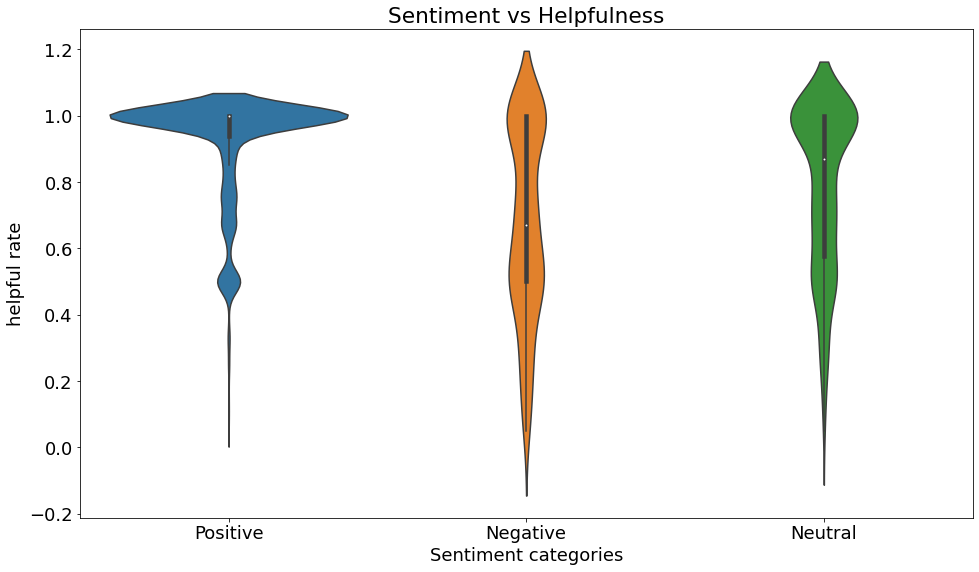

In [73]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
senti_help= pd.DataFrame(process_reviews, columns = ['sentiment', 'helpful_rate'])
senti_help = senti_help[senti_help['helpful_rate'] != 0.00] 

#Plotting phase
sns.violinplot( x=senti_help["sentiment"], y=senti_help["helpful_rate"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('helpful rate')
plt.show()



In [79]:
display(HTML('<p>From the plot we can declare that more number of positive reviews are having high helpful rate. We got deceived by the mean value, its better to look at a plot rather than taking some measures of central tendency under such situation. Our first assumption is correct<hr></p>'))

In [80]:
display(HTML('<p><h4>Year vs Sentiment Count</h4></p>'))

In [81]:
display(HTML('<p>In this block we will see how many reviews were posted based on sentiments in each year from 2004 to 2014</p>'))

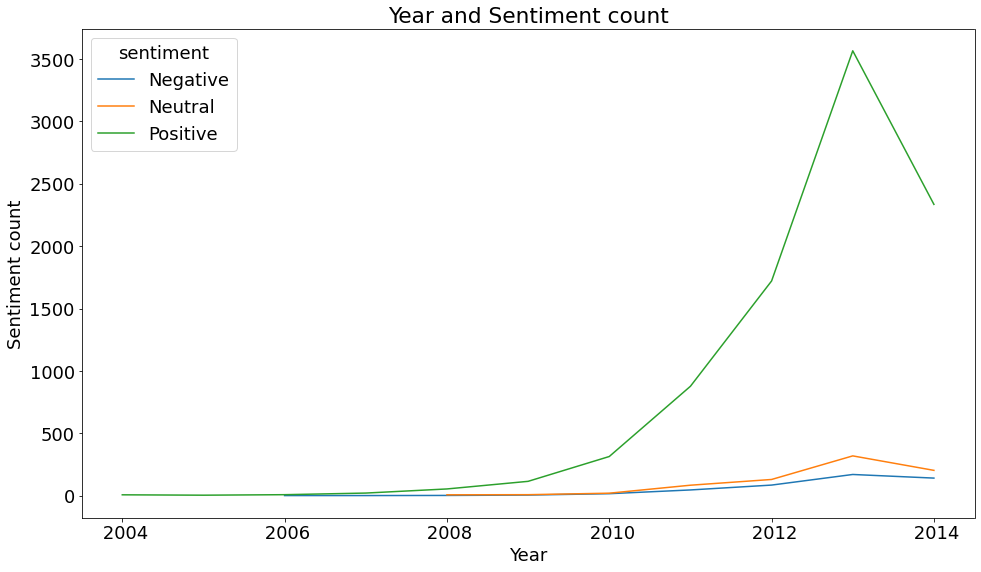

In [82]:
process_reviews.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

In [83]:
display(HTML('<p>From the plot we can clearly see the rise in positive reviews from 2010. Reaching its peak around 2013 and there is a dip in 2014, All the review rates were dropped at this time. Negative and neutral reviews are very low as compared to the positive reviews. Our second assumption is wrong !<hr></p>'))

In [84]:
display(HTML('<p><h4>Day of Month vs Review Count</h4></p>'))

In [85]:
display(HTML('<p>We will see if there are any relationship between reviews and day of month</p>'))

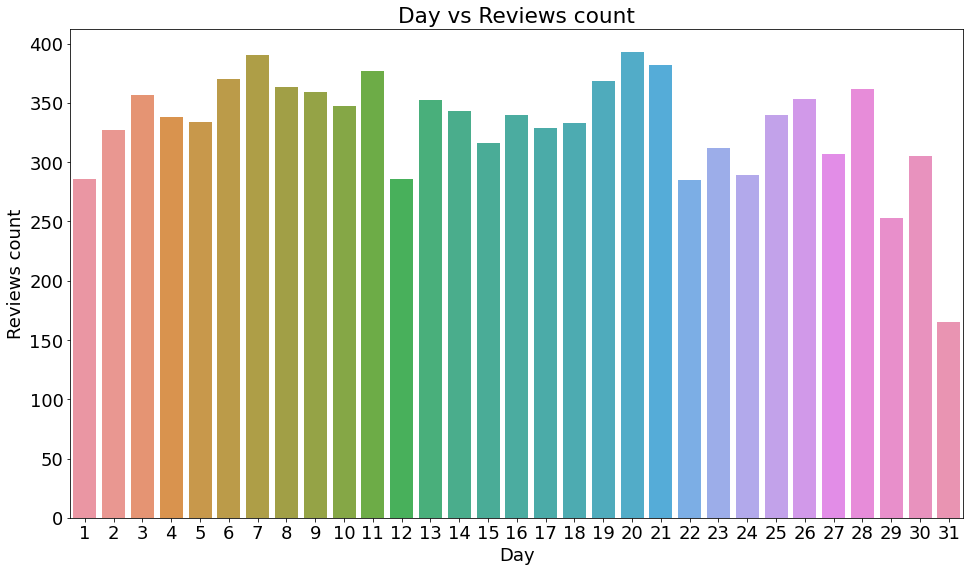

In [86]:
#Creating a dataframe
day=pd.DataFrame(process_reviews.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

In [87]:
display(HTML('<p>The review counts are more or less uniformly distributed.There isnt much variance between the days. But there is a huge drop at the end of month. Our third assumption is wrong ! Never trust your instincts unless you do EDA.<hr></p>'))

In [88]:
display(HTML('<p><h4>Creating few more features for Text Analysis</h4></p>'))

In [90]:
display(HTML('<p>For this, lets create polarity, review length and word count<br>Polarity: We use Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity <br>Review length: length of the review which includes each letters and spaces<br>Word length: This measures how many words are there in review</p>'))

In [91]:
process_reviews['polarity'] = process_reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
process_reviews['review_len'] = process_reviews['reviews'].astype(str).apply(len)
process_reviews['word_count'] = process_reviews['reviews'].apply(lambda x: len(str(x).split()))

In [92]:
process_reviews.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342        5   
1  A14VAT5EAX3D9S  1384719342        5   
2  A195EZSQDW3E21  1384719342        5   
3  A2C00NNG1ZQQG2  1384719342        5   
4   A94QU4C90B1AX  1384719342        5   

                                             reviews sentiment   year month  \
0  not much write but exactly supposed filters po...  Positive   2014    02   
1  product exactly quite affordablei not realized...  Positive   2013    03   
2  primary job device block breath would otherwis...  Positive   2013    08   
3  nice windscreen protects mxl mic prevents pops...  Positive   2014    02   
4  pop filter great looks performs like studio fi...  Positive   2014    02   

  day  helpful_rate  polarity  review_len  word_count  
0  28          0.00  0.250000         162          25  
1  16          0.93  0.014286         356          55  
2  28          1.00  0.167500         315          48  
3  14          0.00  0.333333         169          22  
4  21          0.00  0.800000         136          21

In [93]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [94]:
display(HTML('<p><hr><h4>Sentiment Polarity Distribution</h4></p>'))

In [95]:
display(HTML('<p>Now,let us look at polarity distribution </p>'))

In [96]:
process_reviews['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [98]:
display(HTML('<p>We have a lot of positive polarities compared to the negative polarities<br>This polarity distributions assures the number of positive reviews we had<br>We can say that this polarity is a normally distributed but not standard normal<hr></p>'))

In [99]:
display(HTML('<p><h4>Review Rating Distribution</h4> </p>'))

In [100]:
display(HTML('<p>Now,let us check how overall ratings are distributed </p>'))

In [101]:
process_reviews['overall'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [102]:
display(HTML('<p>We have a large number of 5 ratings(nearly 7k) followed by 4,3,2,1. Its linear in nature<hr></p>'))

In [103]:
display(HTML('<p><h4>Review Text Length Distribution </h4></p>'))

In [104]:
process_reviews['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [105]:
display(HTML('<p>We have a right skewed distribution where most of the lengths falls between 0-1000<hr></p>'))

In [106]:
display(HTML('<p><h4>Review Text Word Count Distribution</h4></p>'))

In [107]:
process_reviews['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')


In [108]:
display(HTML('<p>We have a right skewed distribution with most of the words falling between 0-200 in a a review<hr></p>'))

In [110]:
display(HTML('<p><h4>N-gram Analysis</h4></p>'))

In [111]:
display(HTML('<p>Here we will use n-grams to analyse the text based on its sentiments<hr></p>'))

In [112]:
display(HTML('<p><h4>Monogram Analysis</h4><br> Here we will plot the most frequent one word in reviews based on sentiments</p>'))

In [113]:
#Filtering data
review_pos = process_reviews[process_reviews["sentiment"]=='Positive'].dropna()
review_neu = process_reviews[process_reviews["sentiment"]=='Neutral'].dropna()
review_neg = process_reviews[process_reviews["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')


In [114]:
display(HTML('<p>As we see, the words doesnt match with the sentiment except few. Through monogram we cant judge a sentiment based on one word. So lets try with frequent two words<hr></p>'))

In [115]:
display(HTML('<p><h4>Bigram Analysis</h4><br>Here we will plot the most frequent two words in reviews based on sentiments</p>'))

In [116]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

In [117]:
display(HTML('<p>Here we can get a clear picture about sentiments from the bi-words<hr></p>'))

In [118]:
display(HTML('<p><h4>Trigram Analysis</h4><br>Here we will plot the most frequent three words in reviews based on sentiments</p>'))

In [119]:
## Get the bar chart from positive reviews ##
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')




# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews", 
                                          "Tri-gram plots of Neutral reviews",
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')

In [120]:
display(HTML('<p>By this, we have completed our text analysis<hr></p>'))

In [121]:
display(HTML('<p><h4>Wordcloud for Positive Reviews</h4></p>'))


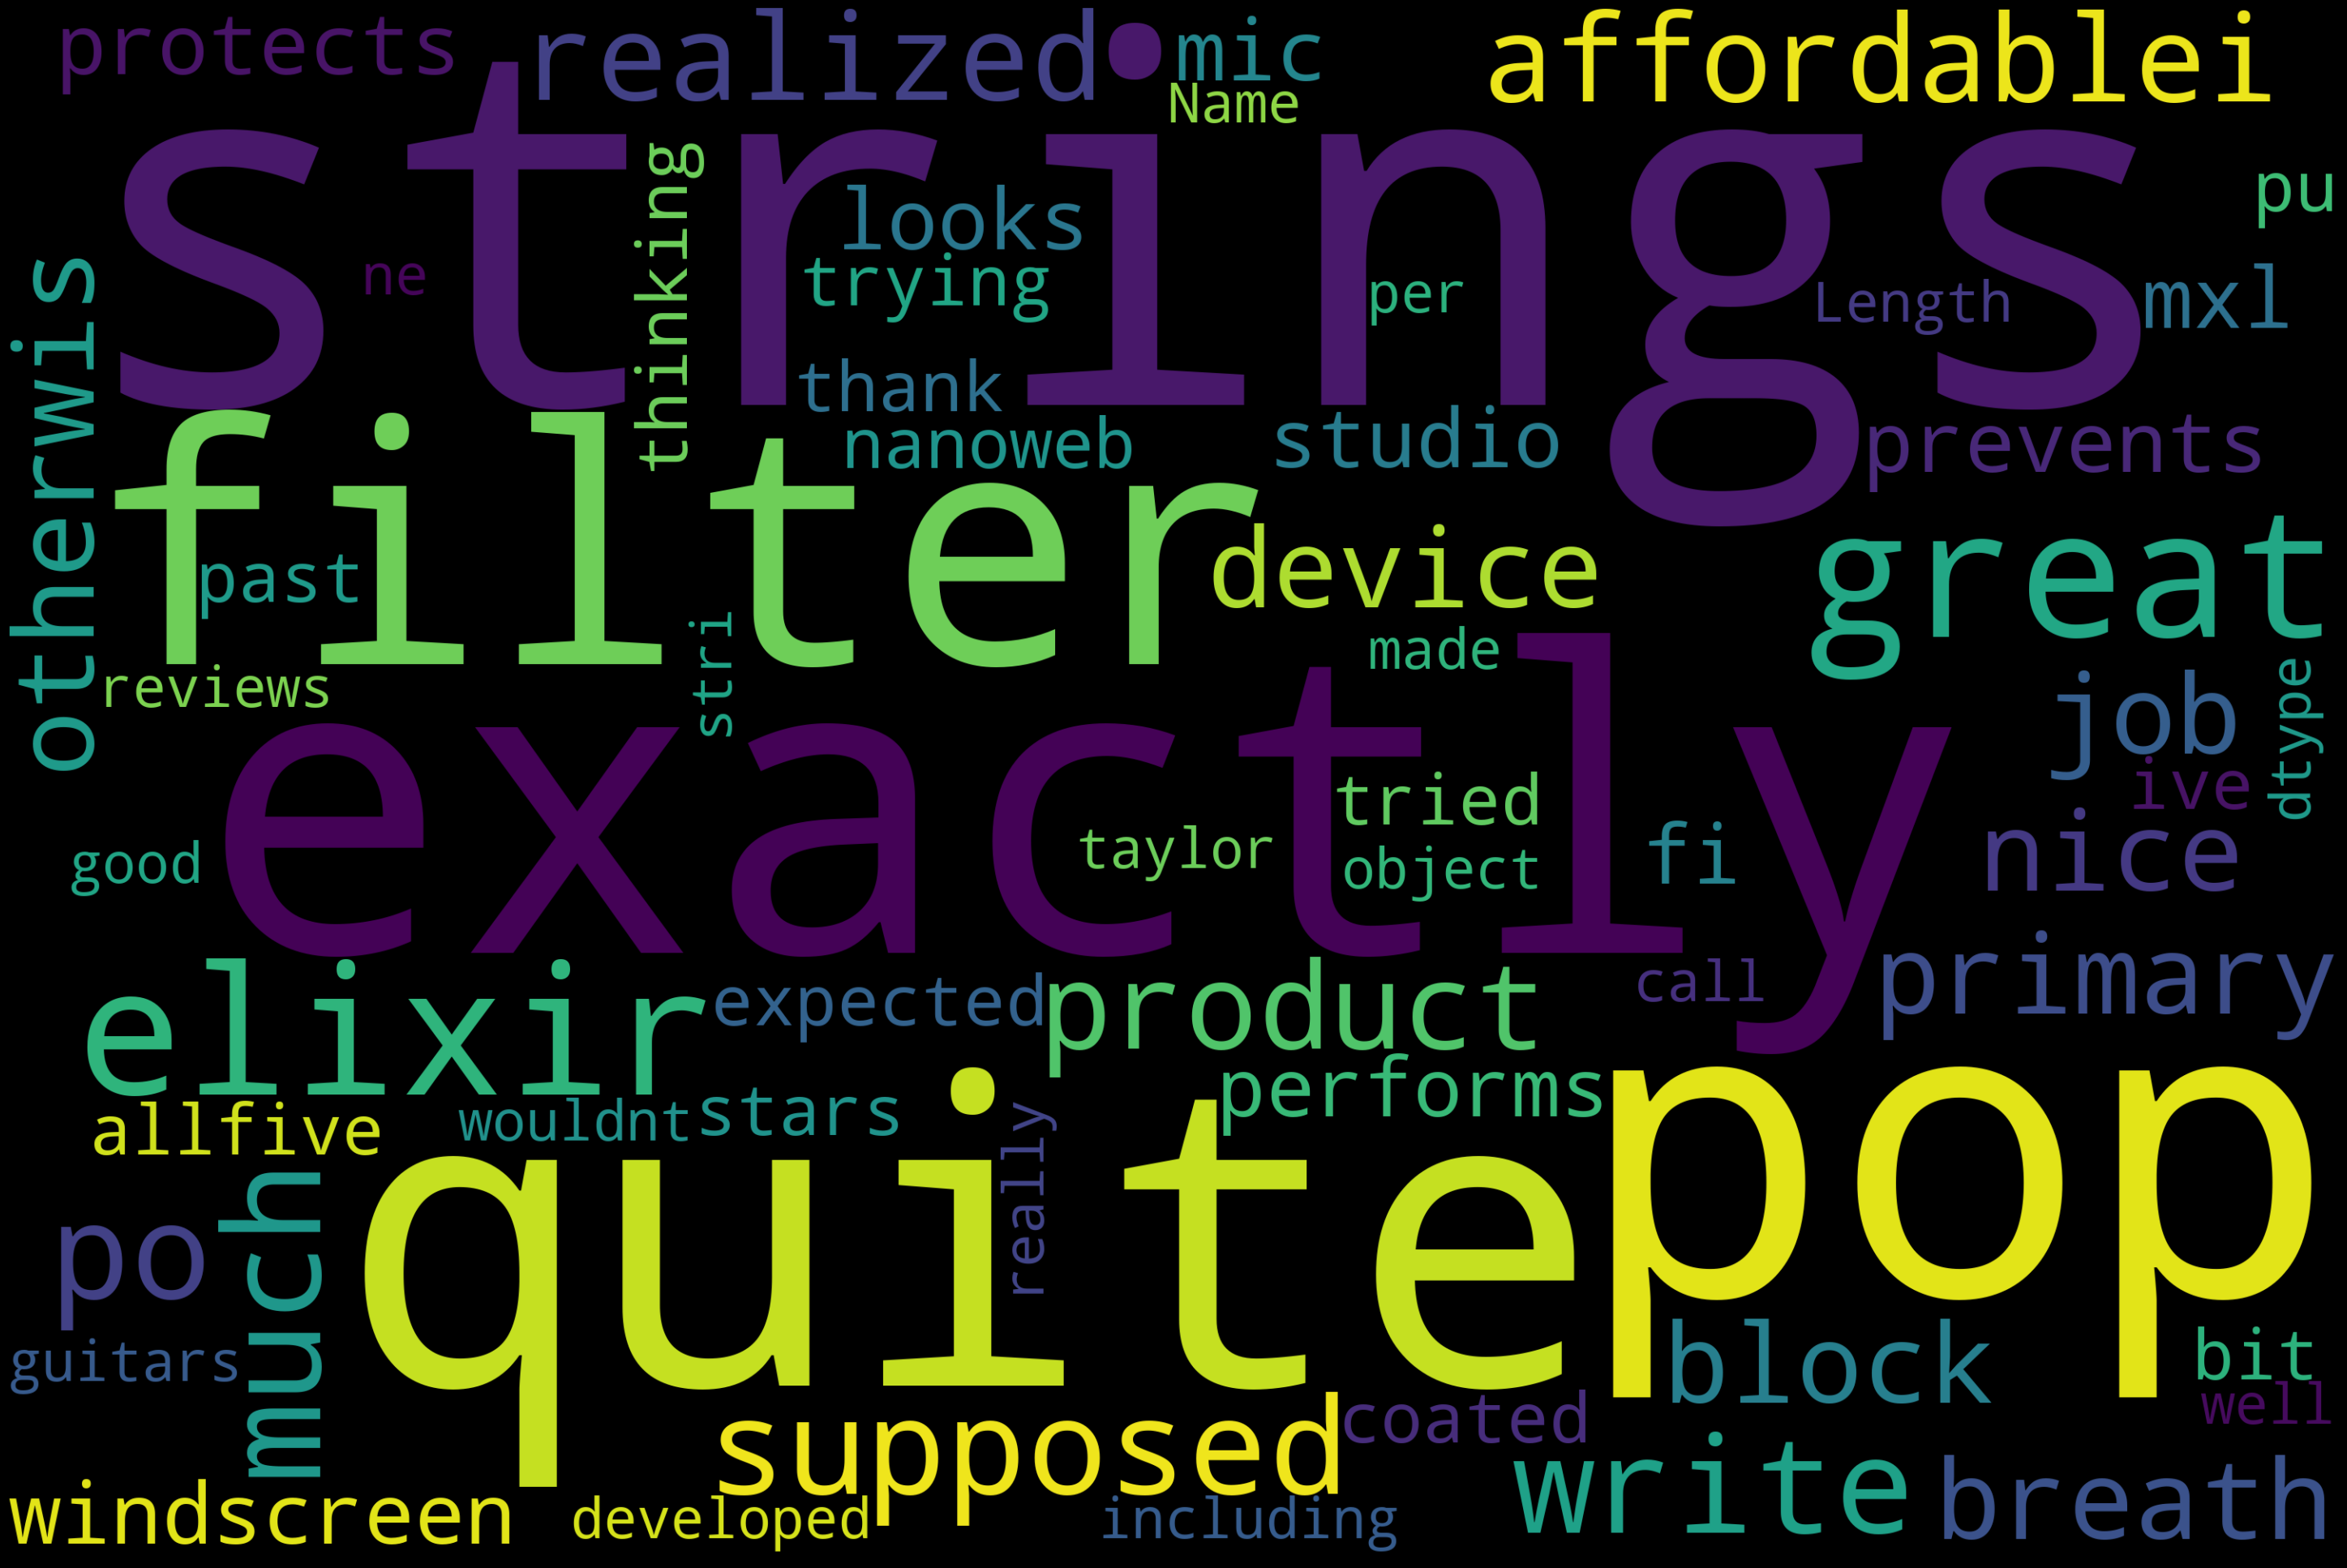

In [122]:
text = review_pos["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [123]:
display(HTML('<p>We can see positive words like great,good, affordable,developed etc.<hr></p>'))


In [124]:
display(HTML('<p><h4>Wordcloud for Neutral Reviews</h4></p>'))


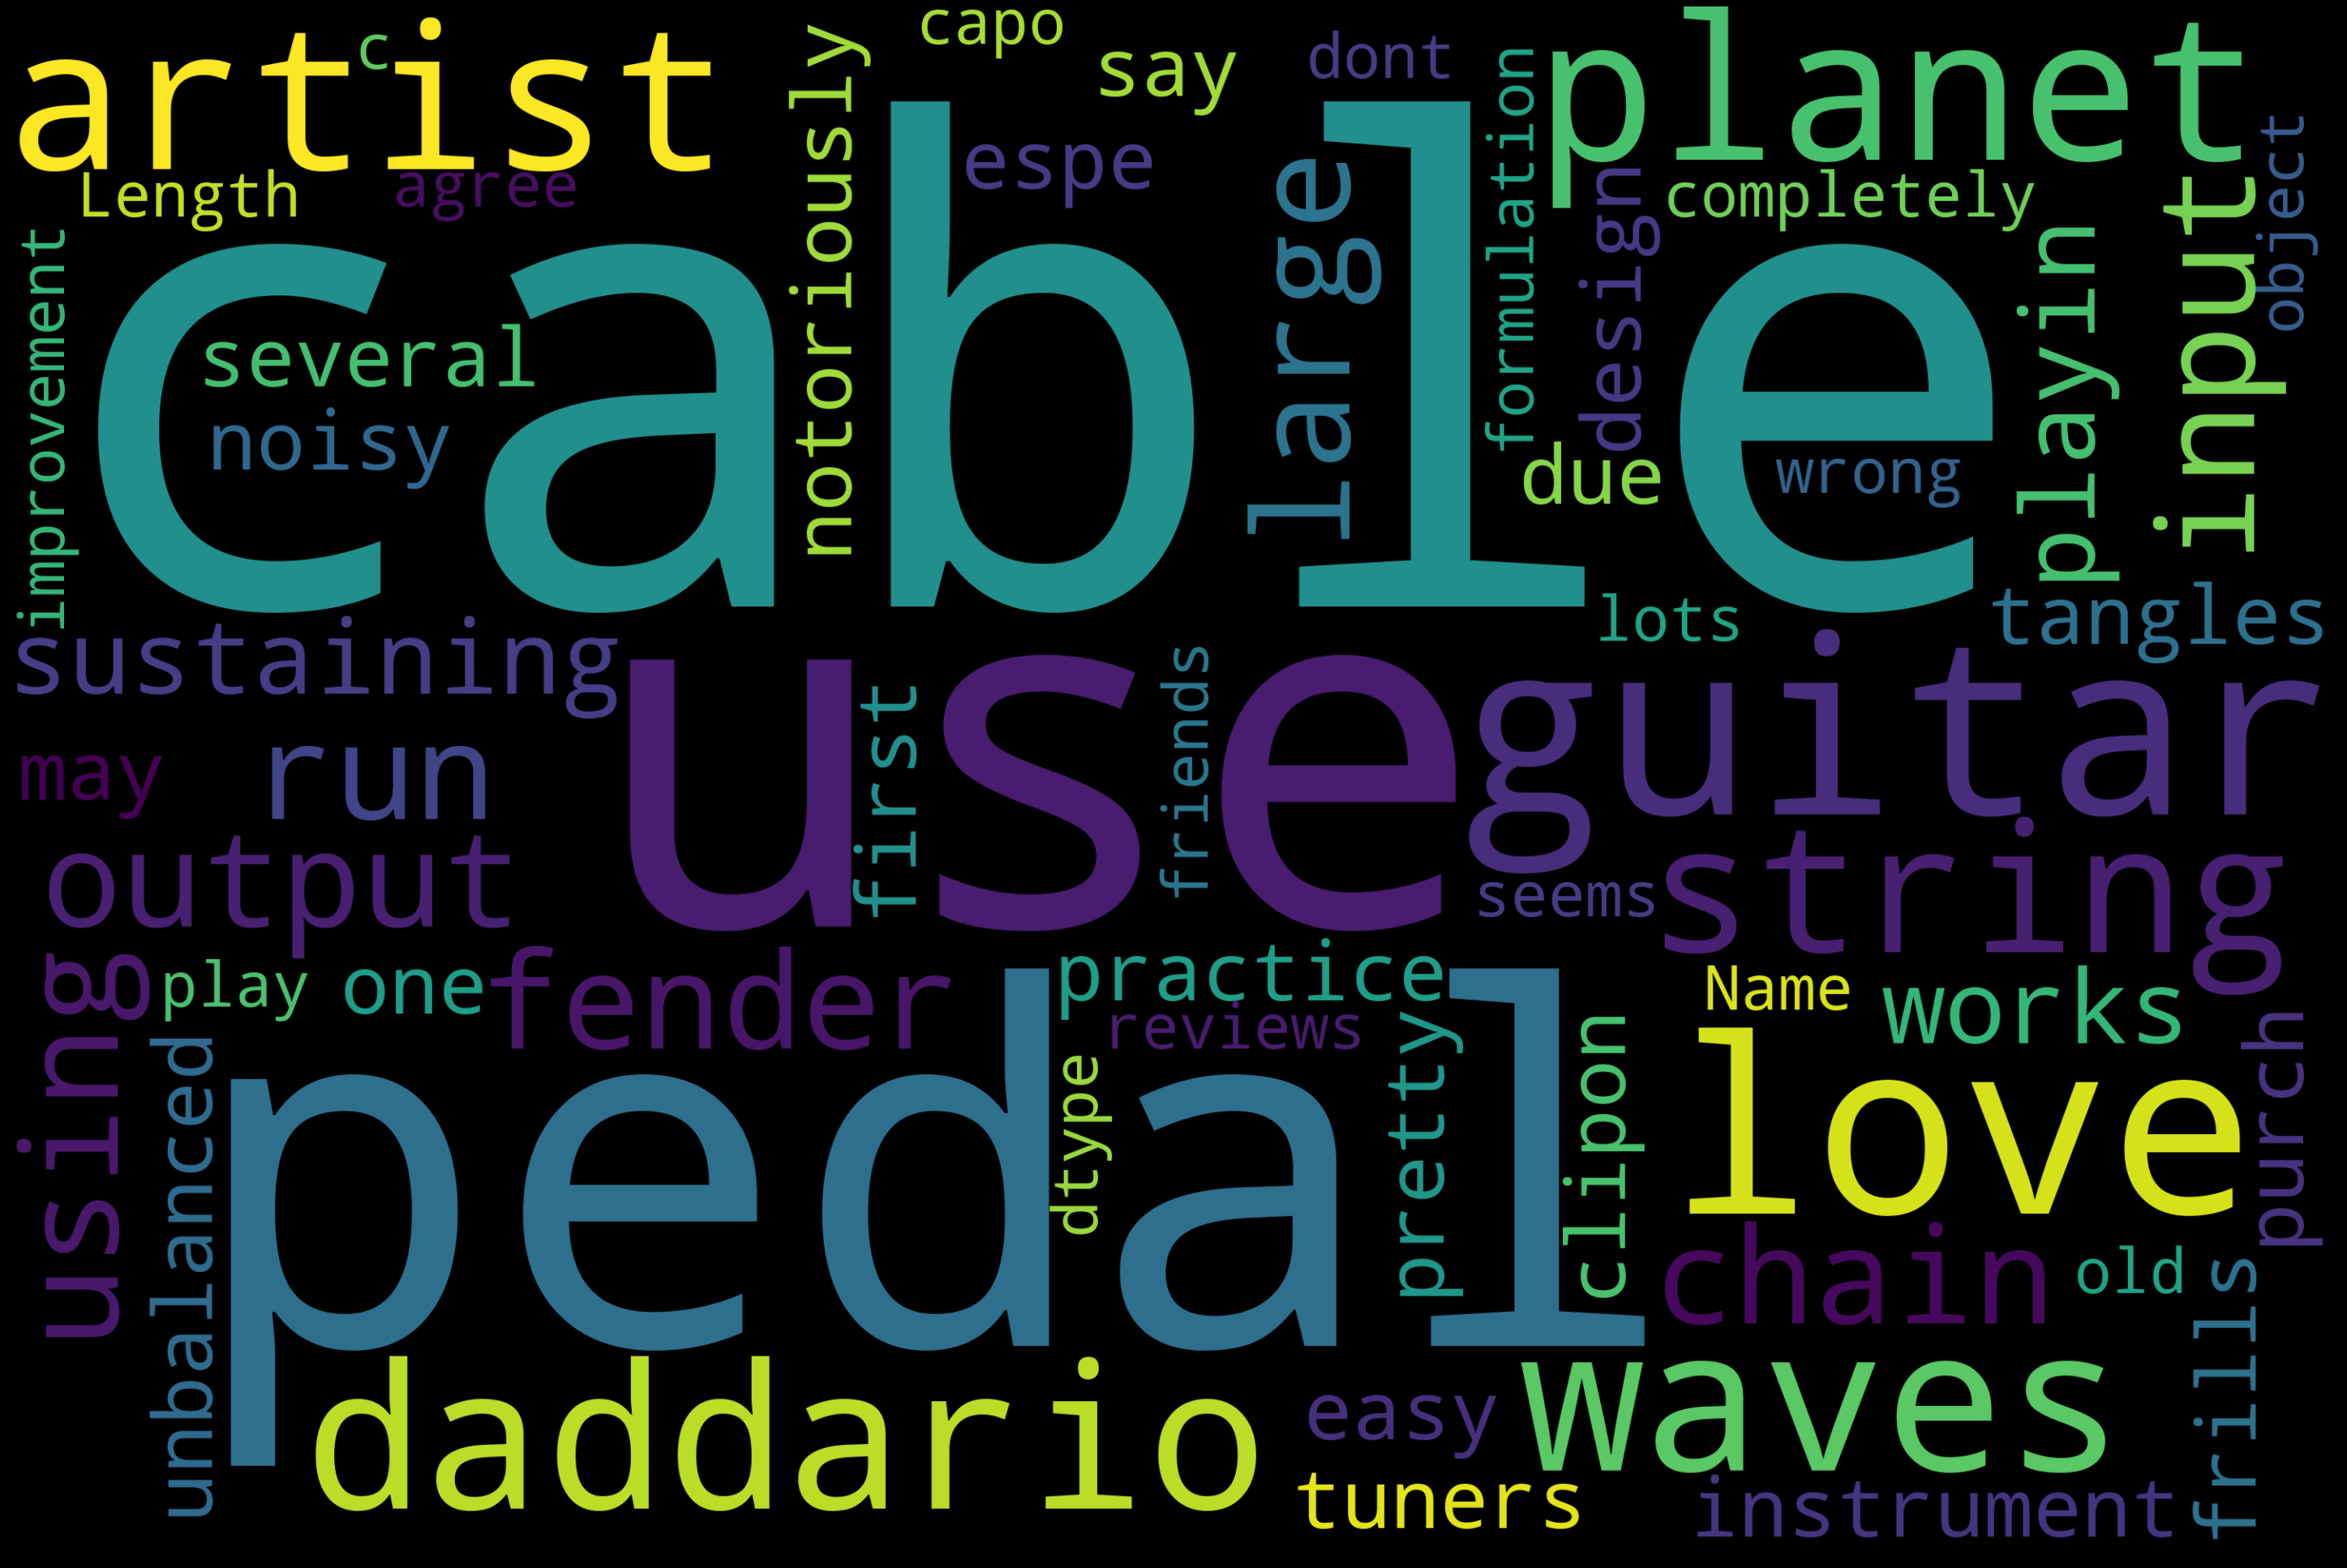

In [125]:
text = review_neu["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [126]:
display(HTML('<p>Most of the neutral review words are focused on the products and how can they be improved<hr></p>'))


In [127]:
display(HTML('<p><h4>Wordcloud for Negative Reviews</h4></p>'))


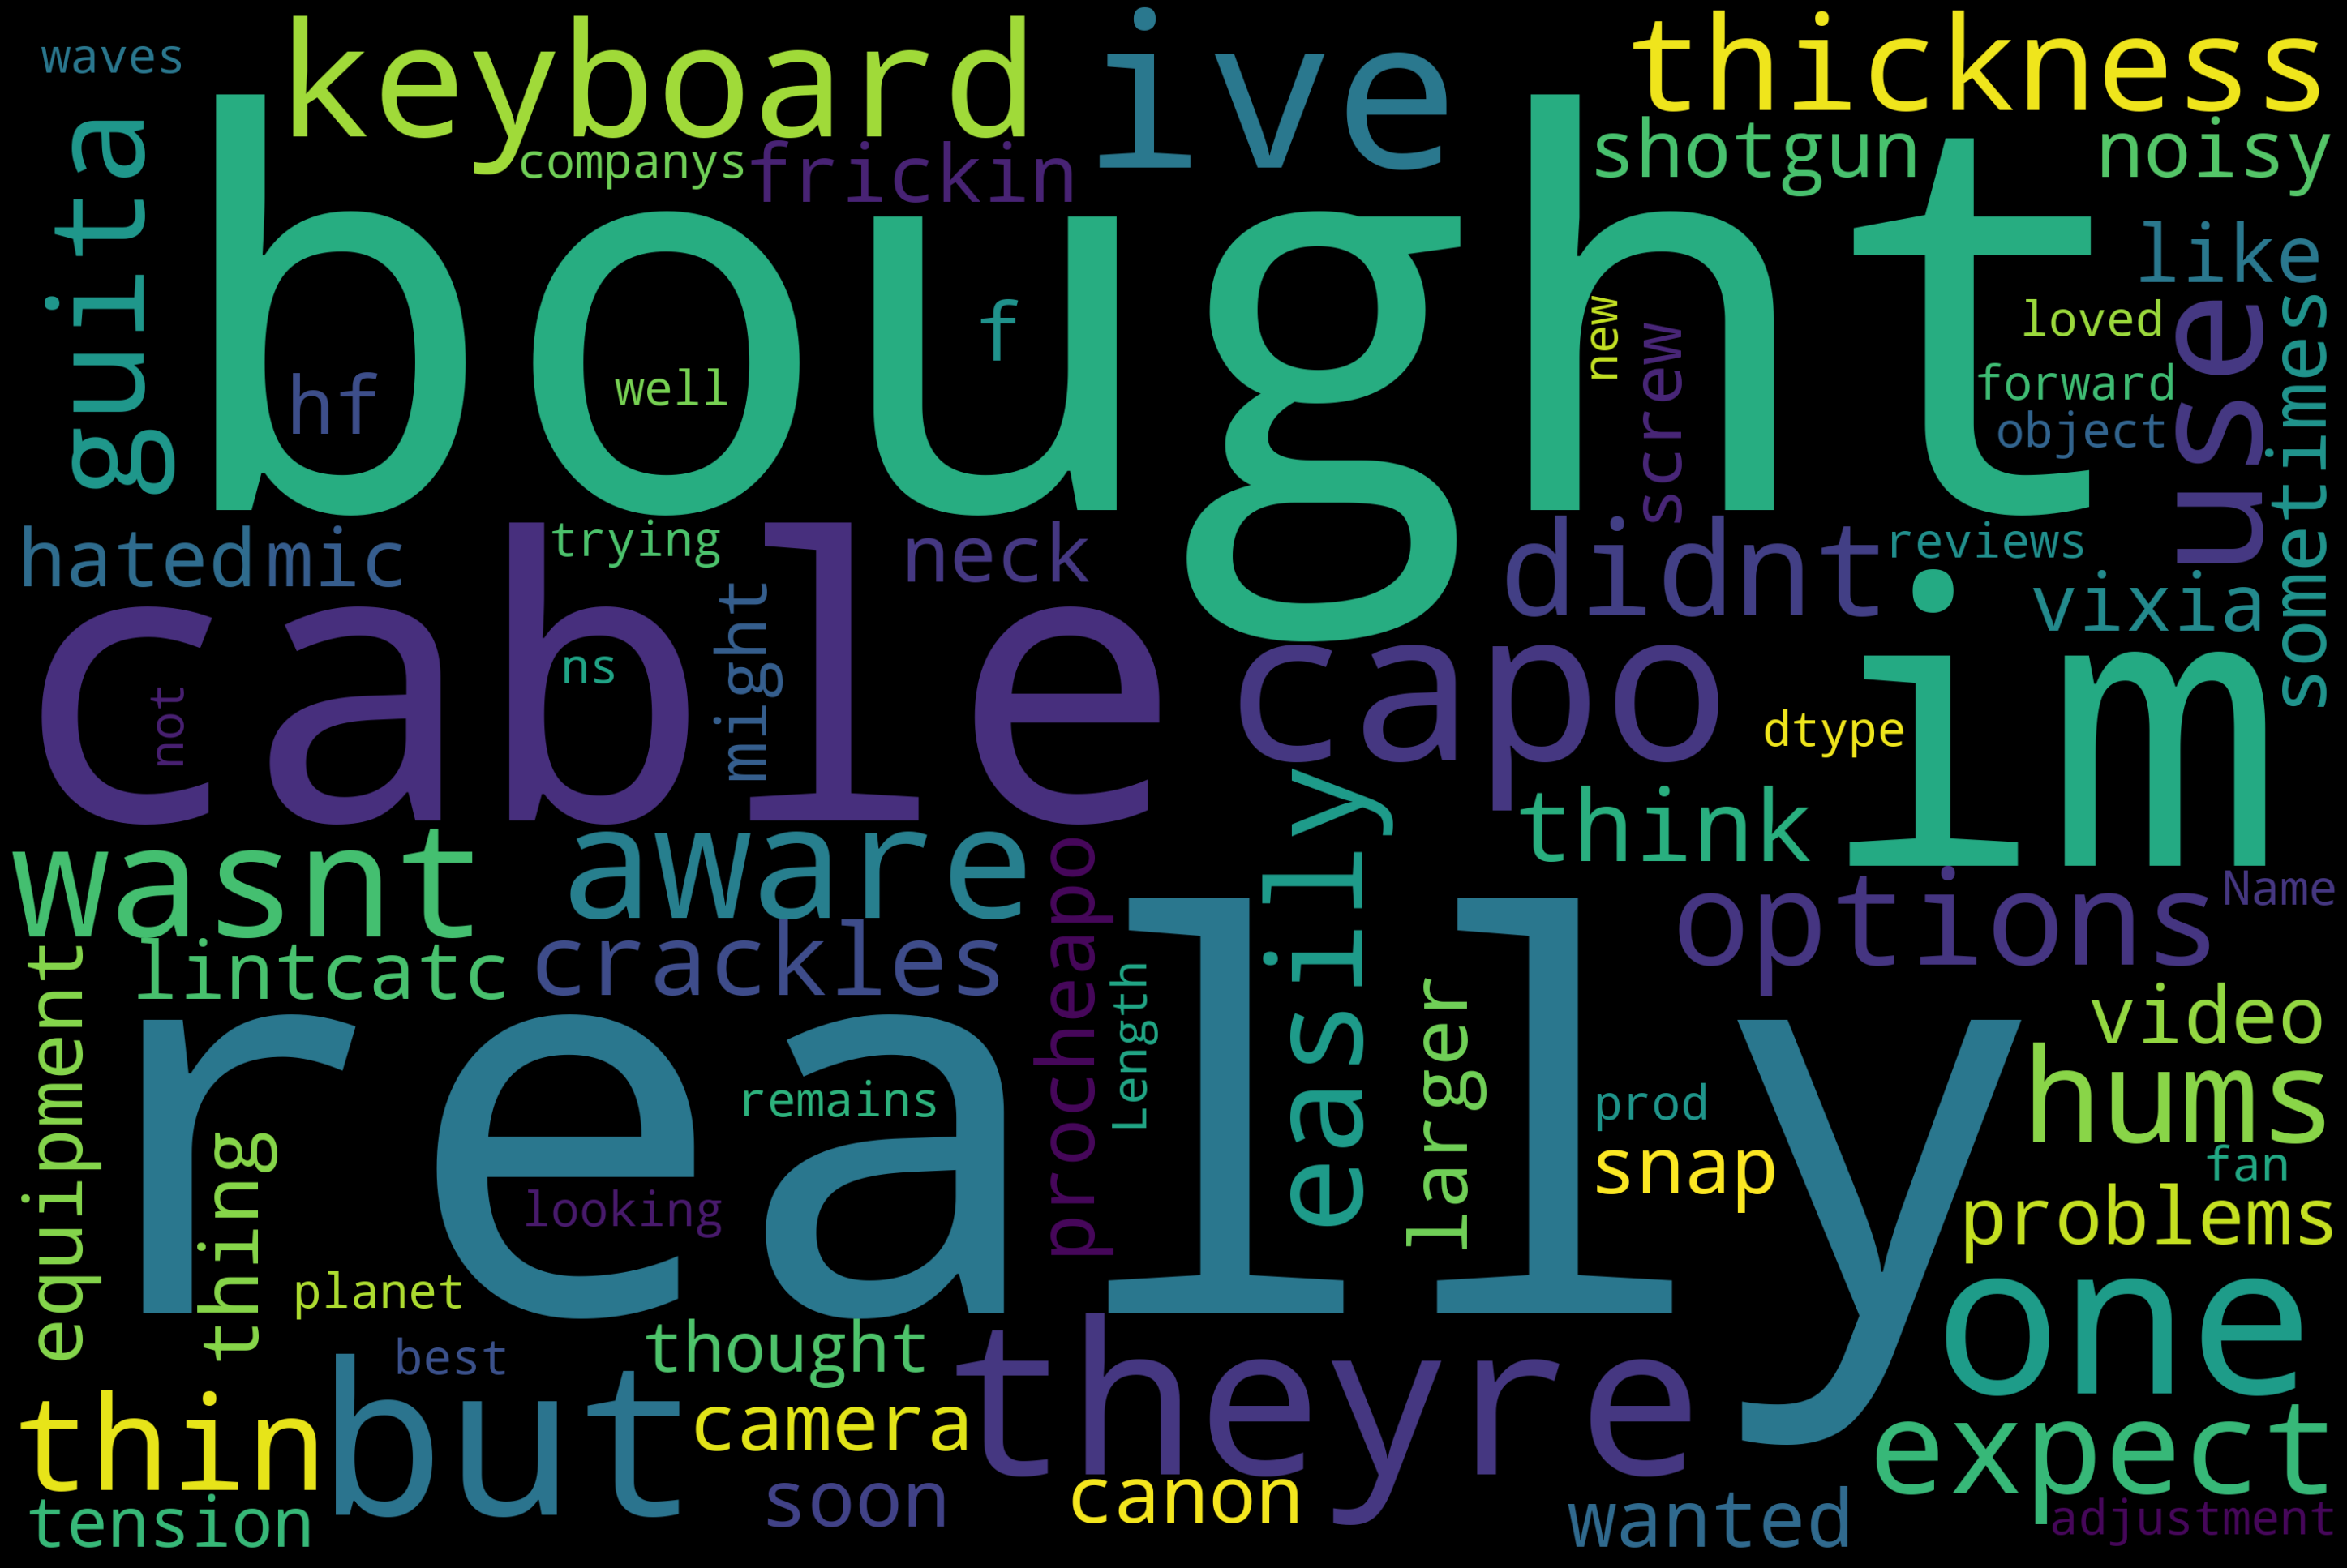

In [128]:
text = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [129]:
display(HTML('<p>We can see negative review words such as noisy, didnt, frickin,wasnt,snap,problems,tension etc, <hr></p>'))


In [130]:
display(HTML('<p><h2>Extracting Features from Cleaned Reviews</h2><br>Before we build the model for our sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. Here we are going to use TF-TDF method to convert the texts<hr></p>'))


In [131]:
display(HTML('<p><h4>Encoding target variable sentiment</h4><br>Label encoding is to convert the labels into a numeric form so as to convert them into a numeric form so as to convert them into the machine-readable form. Here, we will encode our target variable with Label Encoder</p>'))


In [132]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
process_reviews['sentiment']= label_encoder.fit_transform(process_reviews['sentiment']) 
  
process_reviews['sentiment'].unique() 


array([2, 1, 0])

In [133]:
display(HTML('<p>We have encoded the labels in column sentiments</p>'))


In [134]:
process_reviews['sentiment'].value_counts()

2    9022
1     772
0     467
Name: sentiment, dtype: int64

In [135]:
display(HTML('<p><hr><h4>Stemming the Reviews</h4></p>'))


In [136]:
display(HTML('<p>Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word<br>for Example, Going->go, Finally->fina<br>The root word doesnt need to carry a semantic meaning. here we use Stemming</p>'))


In [137]:
#Extracting 'reviews' for processing
review_features=process_reviews.copy()
review_features=review_features[['reviews']].reset_index(drop=True)
review_features.head()



reviews
0  not much write but exactly supposed filters po...
1  product exactly quite affordablei not realized...
2  primary job device block breath would otherwis...
3  nice windscreen protects mxl mic prevents pops...
4  pop filter great looks performs like studio fi...

In [138]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviews'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)    


In [139]:
corpus[3]

'nice windscreen protect mxl mic prevent pop thing gooseneck margin abl hold screen posit requir care posit clamp avoid sagginggood windscreen money'

In [140]:
display(HTML('<p><h6>This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1s and 0s. To encode it we use TFIDF</h6><hr></p>'))


In [141]:
display(HTML('<p><h4>TFIDF Term Frequency — Inverse Document Frequency</h4></p>'))


In [146]:
display(HTML('<p>TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.<br>Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the reviews.</p>'))


In [147]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews'])


In [148]:
X.shape

(10261, 5000)

In [149]:
display(HTML('<p><h6>As we have Considered 5000 words, we can confirm that we have 5000 columns from the shape</h6><hr></p>'))


In [150]:
#Getting the target variable(encoded)
y=process_reviews['sentiment']

In [151]:
display(HTML('<p><h4>Handling Imbalance Target Feature -SMOTE</h4></p>'))


In [154]:
display(HTML('<p>In our target feature, we noticed that we got a lot of positive sentiments compared to negative and neutral. So it is crucial to balance the classes in such situation. Here I use SMOTE(Synthetic Minority Oversampling Technique) to balance out the imbalanced dataset problem.It aims to balance class distribution by randomly increasing minority class examples by replicating them.<br>SMOTE synthesises know minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data. </p>'))


In [155]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')



Original dataset shape : Counter({2: 9022, 1: 772, 0: 467})
Resampled dataset shape Counter({2: 9022, 1: 9022, 0: 9022})


In [156]:
display(HTML('<p>Now, you can see that the resampled data has equally distributed classes<hr></p>'))


In [157]:
display(HTML('<p><h4>Train-Test Split(75:25)</h4></p>'))


In [160]:
display(HTML('<p>Using Train Test Split function, here we are splitting the dataset into 75:25 ratio for tran and test set respectively<hr></p>'))


In [161]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)


In [163]:
display(HTML('<p><center><h2>Model Building: Sentiment Analysis</h2></center></p>'))


In [164]:
display(HTML('<p>As we have successfully processed the text data, now, it is just a normal machine learning problem, where from the sparse matrix we predict the classes in target feature</p>'))


In [165]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [166]:
display(HTML('<p><hr><h4>Model Selection</h4></p>'))


In [167]:
display(HTML('<p>First , we have to select the best performing model by using cross validation.<br>Let us consider all the classification algorithm and perform the model selection process<br></p>'))


In [168]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8809084541929313
Decision Tree Test Accuracy: 0.819414502392517
KNN Test Accuracy: 0.8716498592581203
SVC Test Accuracy: 0.879641302759224
Naive Bayes Test Accuracy: 0.8034287682855306


In [170]:
display(HTML('<p>From the results, we can see logistic regression outdone the rest of the algorithms and all the accuracies from the results are more than 80%. Thats great. So lets go with logistic regression with hyperparameter tuning.<hr></p>'))


In [171]:
display(HTML('<p><hr><h4>Logistic Regression with Hyperparameter Tuning</h4></p>'))


In [172]:
display(HTML('<p>We use regularization parameter and penality for parameter tuning. lets see which one to plug.</p>'))


In [173]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))


LogisticRegression(C=10000.0, random_state=0)
The mean accuracy of the model is: 0.9407418353775676


In [174]:
display(HTML('<p>From the selected parameters , we get accuracy. Plugging and chugging the train and test set we get the following</p>'))


In [175]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.94


In [176]:
display(HTML('<p>We have got 94% accuracy. That aint bad. But for classification problems we need to get confusion matrix and check f1 score rather than accuracy<hr></p>'))


In [178]:
display(HTML('<p><h4>Classification Metrics</h4></p>'))


In [179]:
display(HTML('<p>Here we plot the confusion matrix with ROC and check our f1 score</p>'))


Confusion matrix, without normalization


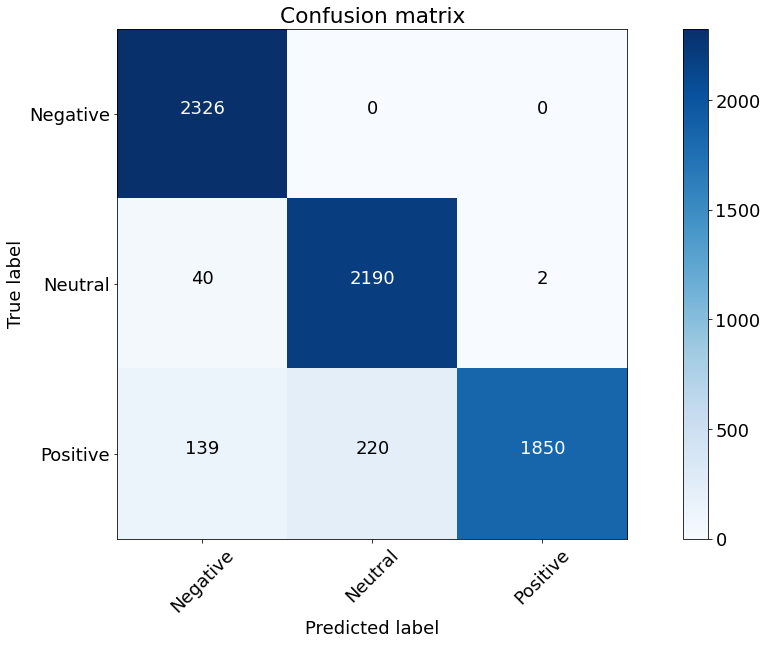

In [180]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])


In [181]:
display(HTML('<p>Check out the diagonal elements(2326+2195+1854), they are correctly predicted records and rest are incorrectly classified by the algorithm</p>'))


In [182]:
display(HTML('<p>Now, let us look at the classification report</p>'))


In [183]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      2326
           1       0.91      0.98      0.94      2232
           2       1.00      0.84      0.91      2209

    accuracy                           0.94      6767
   macro avg       0.95      0.94      0.94      6767
weighted avg       0.94      0.94      0.94      6767



In [184]:
display(HTML('<p>Since predicting both positive,negative and neutral reviews are important we are considering.We got a pretty good f1 score. As we see it got a good score across all classes classified <hr></p>'))


In [185]:
display(HTML('<p><h4>ROC_AUC curve</h4></p>'))


In [186]:
display(HTML('<p>This is a very important curve where we decide on which threshold to setup based upon the objective criteria. Here we plotted ROC for different classes which can help us understand which class was classified better. Also we plot micro and macro averages on the roc curve.</p>'))


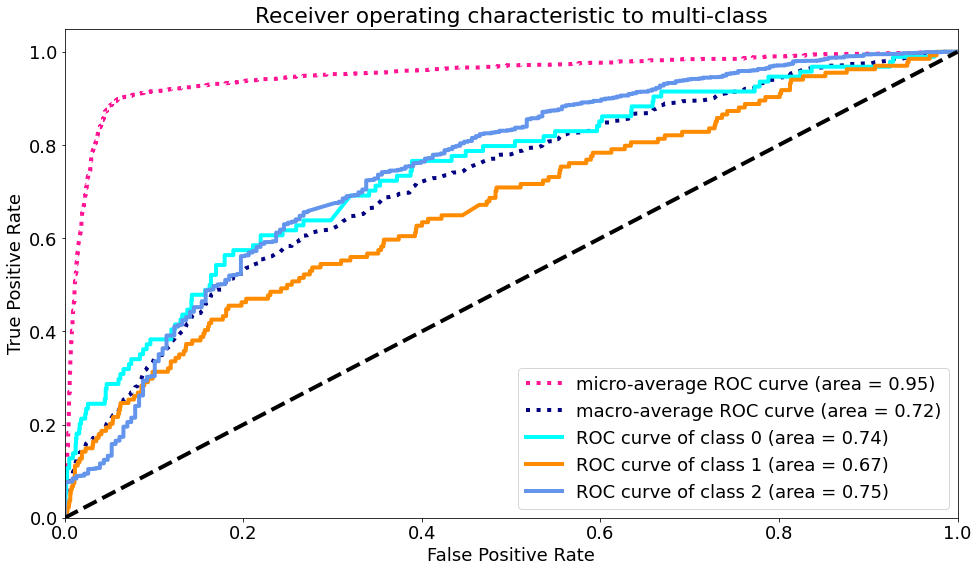

In [187]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [189]:
display(HTML('<p>Considering the ROC curve for classes, class 2 and 0 have been classified pretty well a their area under the curve is high. We can chose any threshold between 0.6-0.8 to get the optimal number of TPR and FPR<br><br>Coming to micro and macro average, micro average preforms really well and macro average shows a not very good score<br><br>If you dont understand what micro and macro average is, just remember the following A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance<hr></p>'))


In [190]:
display(HTML('<p><h4>Conclusion</h4></p>'))


In [191]:
display(HTML('<p>We have done a pretty neat job on classifying all the classes starting from splitting the sentiments based on overall score,text cleaning, customize the stopwords list based on requirement and finally handling imbalance with smote. Here are few insights from the notebook<br><br>Consider welcoming ngram in sentiment analysis as one word cant give is proper results and stop words got to be manually checked as they have negative words. It is advised to avoid using stop words in sentiment analysis.<br><br>Most of our neutral reviews were actual critic of product from the buyers, so amazon can consider these as feedback and give them to the seller to help them improve their products<br><br>Most of the reviews in this dataset were about string instruments such as guitar.<br><br>Balancing the dataset got me a very fruitful accuracy score. Without balancing, I got good precision but very bad recall and inturn affected my f1 score. So balancing the target feature is important<br><br>    In sentiment analysis, we should concentrate on our f1 score where we got an average of 94% so we did a pretty good job.<br><br><hr><hr></p>'))


In [201]:
display(HTML('<p><center><h4>Prepared By<br>Fathima Synsi</h4></center></p>'))
